### **1. Preprocessing**

In [38]:
import pandas as pd

In [39]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [40]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### **2. Dropping Irrelevant Features From The Data**

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###  **3. Encoding Categorical Data**

In [9]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
data = pd.get_dummies(data,drop_first=True)

In [11]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### **4. Cheching Data Balance**

In [12]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
import seaborn as sns

<Axes: ylabel='count'>

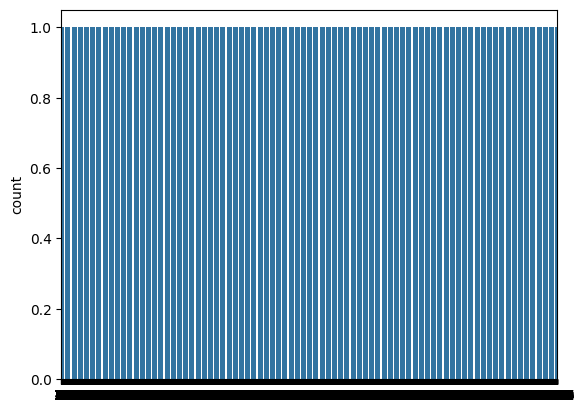

In [14]:
sns.countplot(data['Exited'])

In [15]:
X = data.drop('Exited',axis=1)
y = data['Exited']

### **5. Handling Imbalanced Data With SMOTE**

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [18]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

### **6. Splitting The Dataset Into The Training Set And Test Set**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

**7. Feature Scaling**

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc= StandardScaler()

In [23]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[ 1.16273462, -1.29970865,  0.07468495, ...,  1.73168834,
        -0.46313064, -0.84907241],
       [ 1.09710645,  0.10265327, -1.39649602, ..., -0.57747112,
        -0.46313064,  1.17775586],
       [-0.81704831, -0.6986964 ,  0.44248019, ..., -0.57747112,
        -0.46313064, -0.84907241],
       ...,
       [ 0.20018822,  0.20282198,  1.17807068, ..., -0.57747112,
        -0.46313064,  1.17775586],
       [ 0.32050652,  0.60349681, -1.02870078, ..., -0.57747112,
        -0.46313064, -0.84907241],
       [ 0.52832904,  1.00417165, -1.39649602, ...,  1.73168834,
        -0.46313064,  1.17775586]])

### **8. Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log = LogisticRegression()

In [27]:
log.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred1 = log.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred1)

0.7793471437539234

In [31]:
accuracy_score(y_test,y_pred1)

0.7793471437539234

In [32]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [33]:
precision_score(y_test,y_pred1)

0.7689873417721519

In [34]:
recall_score(y_test,y_pred1)

0.7823567289117836

In [35]:
f1_score(y_test,y_pred1)

0.7756144270667094